Лабораторная работа №5

In [ ]:
import numpy as np
from random import random
import math
import os
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
from random import uniform as uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, accuracy_score

In [ ]:
#Функция апроксимации значений
def approximations_fun(x):
  return x ** 3 * math.pow(math.e, math.sin(x))

In [ ]:
x = np.linspace(-math.pi, math.pi, 50)

x_res = []
for i in range(len(x)):
  xx = []
  xx.append(x[i])
  xx.append(1)
  x_res.append(xx)

x_res = np.asarray(x_res)
y = [approximations_fun(x[i]) for i in range(len(x))]

Back Propogation

In [ ]:
network_layer_1 = 2
neuron_count_1 = [5, 1]

network_layer_2 = 3
neuron_count_2 = [5, 5, 1]

#Сигмовидная функция активации
def activate(x):
  return 1 / (1 + math.pow(math.e, -x))

  #Производная от сигмоидной фукции
def dy_activate(x):
  return activate(x) * (1 - activate(x))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y, test_size = 0.20, random_state=10)

In [ ]:
#Функция генерирования рандомных весов
def generate_weight(size_of_first_layer, neuron_count, network_layer):
  weights = []
  for i in range(network_layer):
    weight_layer = []
    for j in range(neuron_count[i]):
      weight_neuron = []

      if(i == 0):
        for m in range(size_of_first_layer):
          weight_neuron.append(uniform(-0.5, 0.5))
      else:
        for m in range(neuron_count[i - 1] + 1):
          weight_neuron.append(uniform(-0.5, 0.5))
      weight_layer.append(weight_neuron)
    weights.append(weight_layer)
  return weights

In [ ]:
#Функция копирования значений весов
def weights_copy(weights):
  weights_copy = []
  for i in range(len(weights)):
    weights_layer = []
    for j in range(len(weights[i])):
      weights_neuron = []
      for m in range(len(weights[i][j])):
        weights_neuron.append(weights[i][j][m])
      weights_layer.append(weights_neuron)
    weights_copy.append(weights_layer)
  return weights_copy

In [ ]:
#Функция вывода весов
def printWeight(weights, network_layer, neuron_count):
  for i in range(network_layer):
    print("Layer --------------------- {0}".format(i + 1))
    for j in range(neuron_count[i]):
      print("Neuron - {0}".format(j + 1))
      print(weights[i][j])

In [ ]:
weights_1 = generate_weight(len(x_res[0]), neuron_count_1, network_layer_1)
print(printWeight(weights_1, network_layer_1, neuron_count_1))

weights_2 = generate_weight(len(x_res[0]), neuron_count_2, network_layer_2)

Layer --------------------- 1
Neuron - 1
[-0.2570282616429723, 0.3456545207820373]
Neuron - 2
[0.14693387060667673, -0.24868392403052553]
Neuron - 3
[0.4053123942149258, 0.26670518455292924]
Neuron - 4
[0.22322553896062058, -0.3635693196641089]
Neuron - 5
[-0.1536106891191128, 0.25230462008569365]
Layer --------------------- 2
Neuron - 1
[0.12487070465407923, -0.012854200547539718, -0.015206454419699589, -0.4629757407807331, -0.036833856577346724, -0.3769571526501604]
None


In [ ]:
def predict(weights, x_train, bias):
  output_value_by_every_layer = []
  input_value_by_every_layer = []
  for i in range(len(weights)):
    input_value_of_layer = []
    output_value_of_layer = []

    for j in range(len(weights[i])):
      output_value_neuron = 0

      if(i == 0):
        input_value_neuron = np.dot(weights[i][j], x_train)
      else:
        input_value_neuron = np.dot(weights[i][j], output_value_by_every_layer[i - 1])
      
      output_value_neuron = activate(input_value_neuron)
      output_value_of_layer.append(output_value_neuron)
      input_value_of_layer.append(input_value_neuron)

    if(i != len(weights) - 1):
      output_value_of_layer.append(bias)
    else:
      output_value_of_layer = input_value_of_layer

    input_value_by_every_layer.append(input_value_of_layer)
    output_value_by_every_layer.append(output_value_of_layer)

    '''print("Layer {0}".format(i + 1))
    print("Input value")
    print(input_value_of_layer)
    print("Output value")
    print(output_value_of_layer)'''

  return input_value_by_every_layer, output_value_by_every_layer

In [ ]:
intput, output = predict(weights_1,x_train[6] ,1)

In [ ]:
#Функция расчета значений потери между y-предсказанным и y-тестовым
def err_loss(x_test, y_test, weights, bias):
  loss = 0
  last = len(weights) - 1
  for i in range(len(x_test)):
    y_inp, y_out = predict(weights, x_test[i], bias)
    loss += np.square(y_out[last][0] - y_test[i])

  loss = np.sqrt(loss) / len(x_test)
  return loss

  #Функция расчета hitrate
def err_acc(x_test, y_test, weights, eps, bias):
  hit = 0
  last = len(weights) - 1
  for i in range(len(x_test)):
    y_inp, y_out = predict(weights, x_test[i], bias)
    if(np.abs(y_out[last][0] - y_test[i]) < eps): hit = hit + 1
  return hit / len(x_test)

In [ ]:
def back_Propogation(weights, epoch, a, x_train, y_train, x_test, y_test, bias):
  sigma_list = []
  for i in range(len(weights)):
    any_list = []
    for j in range(len(weights[i])):
      any_list.append(0)
    sigma_list.append(any_list)

  last_index = len(weights) - 1
  error = 0
  for i in range(epoch):

    print("Эпоха №{0}".format(i+ 1))
    print("Loss: {0}".format(err_loss(x_test, y_test, weights, bias)))
    for j in range(len(x_train)):
      input_value, output_value = predict(weights, x_train[j], bias)

      #Выходной нейрон
      error = y_train[j] - output_value[last_index][0]
      g = dy_activate(input_value[last_index][0]) * error
      sigma_list[last_index][0] = g

      for p in range(len(weights[last_index][0])):
        weights[last_index][0][p] += a * g * output_value[last_index - 1][p]
      
      #Скрытый слой
      for p in range(last_index - 1, -1, -1):
        for m in range(len(weights[p])):
          sigma = 0
          for k in range(len(weights[p + 1])):
            sigma += weights[p + 1][k][m] * sigma_list[p + 1][k]
          
          g = sigma * dy_activate(input_value[p][m])
          sigma_list[p][m] = g

          if(p == 0):
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * x_train[j][k]
          else:
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * output_value[p - 1][k]

  return weights

In [ ]:
weights_bp_1 = back_Propogation(weights_1, 3000, 1, x_train, y_train, x_test, y_test, 1)

Выходные данные были обрезаны до нескольких последних строк (5000).
Эпоха №501
Loss: 2.8087423127195104
Эпоха №502
Loss: 2.8084681810745313
Эпоха №503
Loss: 2.808194907689199
Эпоха №504
Loss: 2.8079224886550223
Эпоха №505
Loss: 2.807650920088561
Эпоха №506
Loss: 2.8073801981312267
Эпоха №507
Loss: 2.8071103189490665
Эпоха №508
Loss: 2.8068412787325534
Эпоха №509
Loss: 2.8065730736963803
Эпоха №510
Loss: 2.8063057000792546
Эпоха №511
Loss: 2.806039154143707
Эпоха №512
Loss: 2.8057734321758767
Эпоха №513
Loss: 2.805508530485322
Эпоха №514
Loss: 2.805244445404827
Эпоха №515
Loss: 2.804981173290198
Эпоха №516
Loss: 2.8047187105200817
Эпоха №517
Loss: 2.8044570534957813
Эпоха №518
Loss: 2.804196198641038
Эпоха №519
Loss: 2.803936142401889
Эпоха №520
Loss: 2.8036768812464525
Эпоха №521
Loss: 2.8034184116647594
Эпоха №522
Loss: 2.8031607301685626
Эпоха №523
Loss: 2.8029038332911735
Эпоха №524
Loss: 2.80264771758727
Эпоха №525
Loss: 2.8023923796327344
Эпоха №526
Loss: 2.8021378160244725
Эпоха 

In [ ]:
weights_bp_2 = back_Propogation(weights_2, 3000, 1, x_train, y_train, x_test, y_test, 1)

Выходные данные были обрезаны до нескольких последних строк (5000).
Эпоха №501
Loss: 2.899941595480854
Эпоха №502
Loss: 2.8996692508686475
Эпоха №503
Loss: 2.8993975468263846
Эпоха №504
Loss: 2.899126468062309
Эпоха №505
Loss: 2.8988559995630157
Эпоха №506
Loss: 2.898586126588806
Эпоха №507
Loss: 2.8983168346691572
Эпоха №508
Loss: 2.8980481095982924
Эпоха №509
Loss: 2.8977799374308493
Эпоха №510
Loss: 2.8975123044776567
Эпоха №511
Loss: 2.8972451973015323
Эпоха №512
Loss: 2.8969786027132742
Эпоха №513
Loss: 2.8967125077676648
Эпоха №514
Loss: 2.896446899759561
Эпоха №515
Loss: 2.8961817662201272
Эпоха №516
Loss: 2.8959170949130377
Эпоха №517
Loss: 2.895652873830884
Эпоха №518
Loss: 2.89538909119156
Эпоха №519
Loss: 2.8951257354347506
Эпоха №520
Loss: 2.8948627952185086
Эпоха №521
Loss: 2.8946002594158577
Эпоха №522
Loss: 2.89433811711153
Эпоха №523
Loss: 2.8940763575986996
Эпоха №524
Loss: 2.893814970375784
Эпоха №525
Loss: 2.893553945143376
Эпоха №526
Loss: 2.893293271801162
Эпоха №5

In [ ]:
predict1 = []
for i in range(len(x_res)):
  intput, output = predict(weights_bp_1,x_res[i] ,1)
  predict1.append(output[-1][0])

predict2 = []
for i in range(len(x_res)):
  intput, output = predict(weights_bp_2,x_res[i] ,1)
  predict2.append(output[-1][0])

RBF


In [ ]:
#Функция для вычисления нашей одномерной функции активации, которую будем использовать при вычислении параметров матрицы
#(Эта функция похожа на функицю активации, только в более простом виде, если активация - имееет общий вид)
def fun_h(x , a , c):
  return np.exp(-a * np.abs(x - c))

#Матрица h, которая вычисляет все наши веса, использую нашу функцию (значения функции активации на каждом нейроне)
#t_c - количество нейронов скрытого слоя
#t_x - количесво примеров в обучающей выборке
def fun_H(t_x, t_c, a):
  H = np.zeros((len(t_x), len(t_c)))
  for i in range(len(t_x)):
    for j in range(len(t_c)):
      H[i][j] = fun_h(t_x[i], a, t_c[j])
  return H

#Функция для вычисления нейронной сети
def fun_RBF(x, t_c, a, w):
  h = np.zeros(len(t_c))
  for i in range(len(t_c)):
    h[i] = fun_h(x, a, t_c[i])
  return np.dot(h, w)

In [ ]:
#Выбор центров на основе анализа первичных данных (кластерный анализ)
test_c = np.linspace(-math.pi, math.pi, 5)
#test_c = np.array([-2 , -1, 0, 1, 2])

r = 1.5
a = 1 / (2 * r * r)

In [ ]:
#Обучение нейронки
H = fun_H(x , test_c , a)

#Количетсво столбцов - количество нейронов на скрытом слое 
#Количество строк - кол.входных значений

In [ ]:
H_ = np.dot(np.linalg.inv(np.dot(H.transpose(), H)), H.transpose())
W = np.dot(H_, y)
print(W)
#X = np.linspace(-2, 2, 100)
pred_y = np.zeros((len(x)))
for i in range(len(x)):
  pred_y[i] = fun_RBF(x[i], test_c, a, W)

[-48.31633222  41.35715579 -24.49083599 -17.06542239  58.13060978]


Сравнение

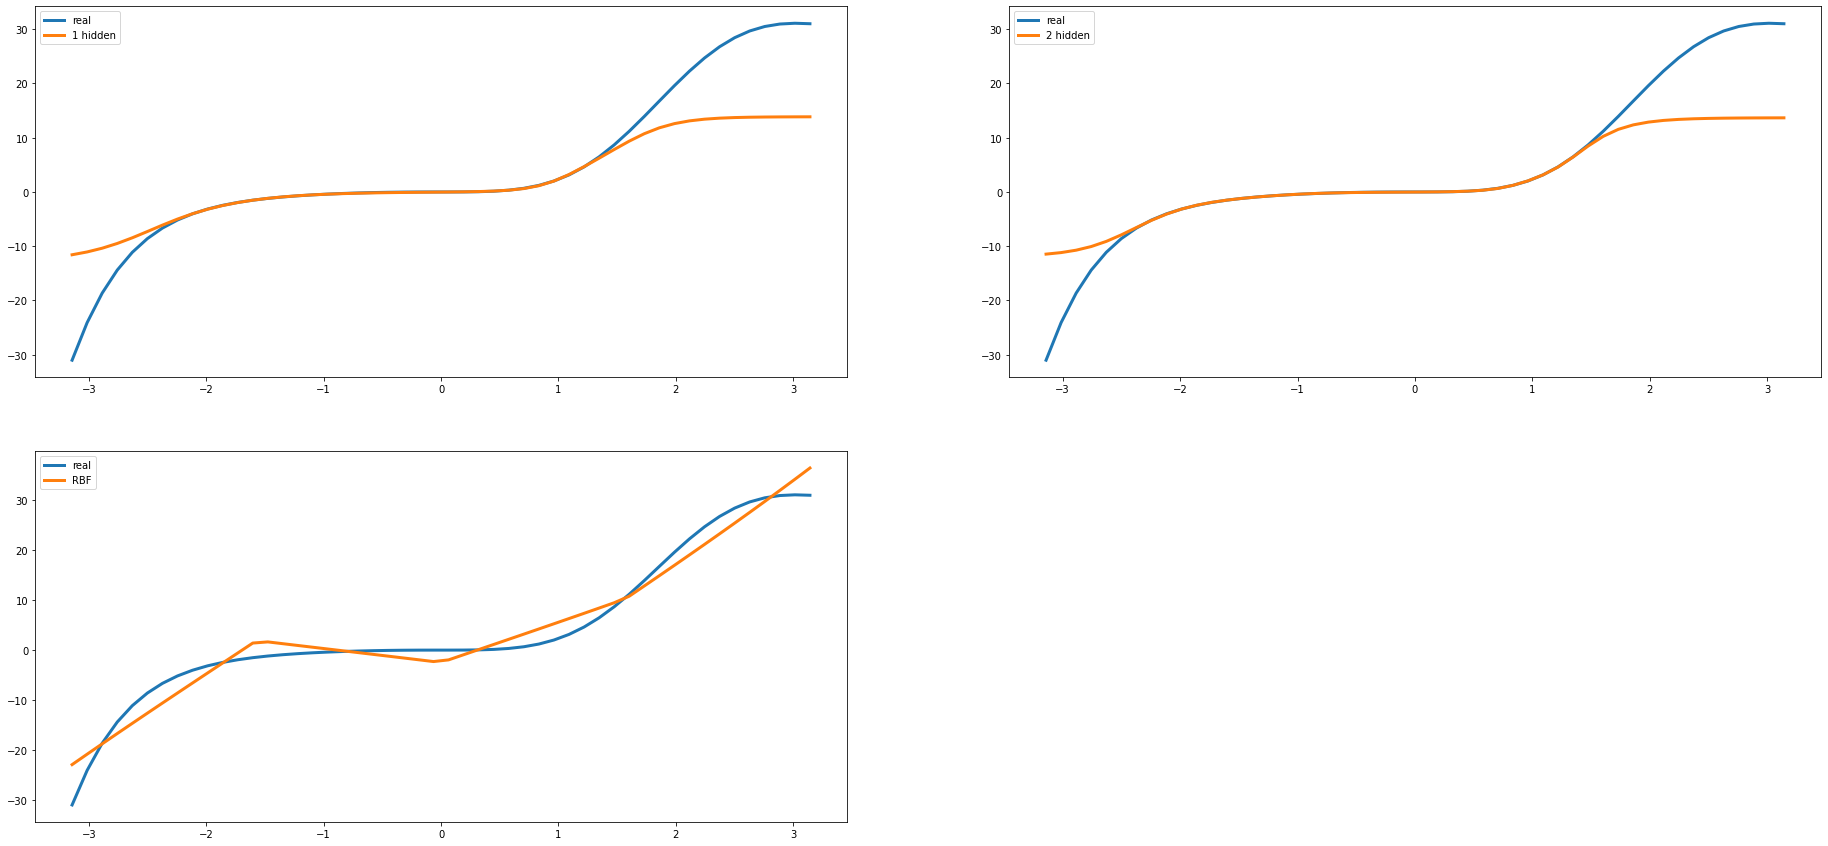

In [ ]:
plt.figure(figsize = (32, 15))
plt.subplot(2, 2, 1)
plt.plot(x, y, linewidth = 3, label = 'real')
plt.plot(x, predict1, linewidth = 3, label = '1 hidden')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y, linewidth = 3, label = 'real')
plt.plot(x, predict2, linewidth = 3, label = '2 hidden')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y, linewidth = 3, label = 'real')
plt.plot(x, pred_y, linewidth = 3, label = 'RBF')
plt.legend()

2 часть

In [ ]:
from sklearn import preprocessing

#money = ([2.4734, 2.4734, 2.4865, 2.4791, 2.4780, 2.4780, 2.4780, 2.4780, 2.4709, 2.4718, 2.4851, 2.4778, 2.4778, 2.4708, 2.4705, 2.4582, 2.4528, 2.4501, 2.4501, 2.4501, 2.4469, 2.4471, 2.4471, 2.4447, 2.4364, 2.4364, 2.4364, 2.4540, 2.4695, 2.4683])
#money = preprocessing.normalize([money])
#money = money[0]

#money_for_test = [2.4725, 2.4705, 2.4705, 2.4705, 2.4703, 2.4639, 2.4599, 2.4601, 2.4549, 2.4549, 2.4549, 2.4420, 2.4341, 2.4328, 2.4436, 2.4332, 2.4432, 2.4432, 2.4390, 2.4377, 2.4349, 2.4287, 2.4287, 2.4287, 2.4287, 2.4260, 2.4281, 2.4339]
#money_for_test = preprocessing.normalize([money_for_test])
#money_for_test = money_for_test[0]

t = [0, 2, 0, -1, -4, -4, -8, -10, -9, -7, -13, -8, -1, -3, -3, -2, 0, 3, -1, -3, -2, -4, -7, -9, -9, -9, -10, -9, 1, 1, 0]
t_test = [4, 1, 1, 3, -1, -1, 1, 0, -1, -2, -2, -1, -2, -7, -12, -17, -16, -15, -15, -11, 0, 13, 5, 5, 1, 0, -1, -3, -3, -2]

Text(0, 0.5, 't')

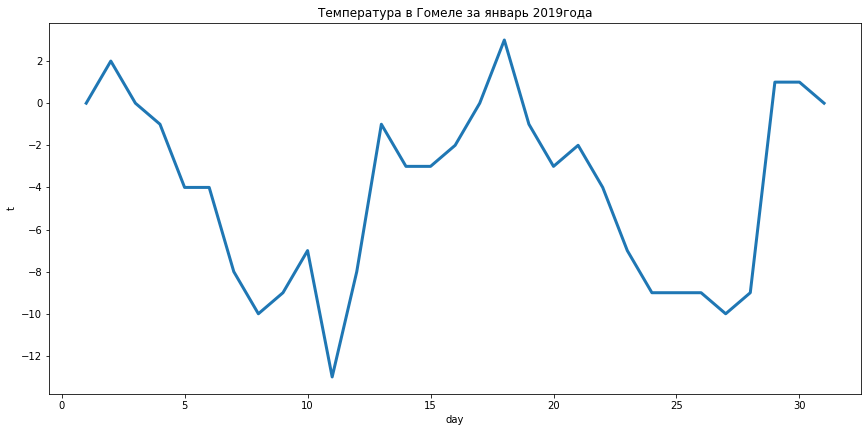

In [ ]:
plt.figure(figsize = (32, 15))
plt.subplot(2, 2, 1)
plt.plot(range(1 , len(t) + 1, 1), t, linewidth = 3)
plt.title('Температура в Гомеле за январь 2019года')
plt.xlabel('day')
plt.ylabel('t')

In [ ]:
#Функция скользящего окна для получения x и y по логике: каждое значение y получается с учетом стольких значений, сколько задано в iteration_size
def get_x_and_y(money, iteration_size):
  x = []
  y = []
  for i in range(len(money) - iteration_size):
    x_buffer = []
    for j in range(iteration_size):
      x_buffer.append(money[i + j])
    x.append(x_buffer)
    y.append(money[i + iteration_size])
  return x, y

In [ ]:
x, y = get_x_and_y(t, 5)
x1, y1 = get_x_and_y(t_test, 5)
#вставка bias
for i in range(len(x)):
  x[i].append(1)
for i in range(len(x1)):
  x1[i].append(1)

In [ ]:
#Деление данных
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size = 0.20, random_state=10)

In [ ]:
'''print("Январь:")
print(x)
print(y)
print("Февраль:")
print(x1)
print(y1)'''

'print("Январь:")\nprint(x)\nprint(y)\nprint("Февраль:")\nprint(x1)\nprint(y1)'

In [ ]:
neuron_count_3 = [16, 8, 4, 1]
network_layer_3 = 4
weights_3 = generate_weight(len(x_trn[0]), neuron_count_3, network_layer_3)

weights_bp_3 = back_Propogation(weights_3, 1000, 0.1, x_trn, y_trn, x_tst, y_tst, 1)

predict_y_test = []
for i in range(len(x1)):
  intput, output = predict(weights_bp_3, x1[i], 1)
  predict_y_test.append(output[-1][0])
print("y true: ")
print(y1)
print("y_predict: ")
print(predict_y_test)

Эпоха №1
Loss: 3.7483407386257777
Эпоха №2
Loss: 2.7291887133731705
Эпоха №3
Loss: 2.503288555162785
Эпоха №4
Loss: 2.4018075448135914
Эпоха №5
Loss: 2.3406482083940117
Эпоха №6
Loss: 2.298806870743891
Эпоха №7
Loss: 2.268076873680108
Эпоха №8
Loss: 2.244461158301061
Эпоха №9
Loss: 2.2257346750869824
Эпоха №10
Loss: 2.210541544038095
Эпоха №11
Loss: 2.1979995293622907
Эпоха №12
Loss: 2.1875052447744
Эпоха №13
Loss: 2.1786295138546046
Эпоха №14
Loss: 2.171057250251662
Эпоха №15
Loss: 2.1645510098271523
Эпоха №16
Loss: 2.15892790037912
Эпоха №17
Loss: 2.154044406507777
Эпоха №18
Loss: 2.1497861008831483
Эпоха №19
Loss: 2.146060479193365
Эпоха №20
Loss: 2.1427918528716
Эпоха №21
Loss: 2.1399176333906875
Эпоха №22
Loss: 2.137385579526978
Эпоха №23
Loss: 2.135151724750371
Эпоха №24
Loss: 2.133178793816652
Эпоха №25
Loss: 2.1314349770526517
Эпоха №26
Loss: 2.1298929700866664
Эпоха №27
Loss: 2.1285292132431954
Эпоха №28
Loss: 2.1273232829870556
Эпоха №29
Loss: 2.126257400477121
Эпоха №30
Loss

Text(0, 0.5, 't')

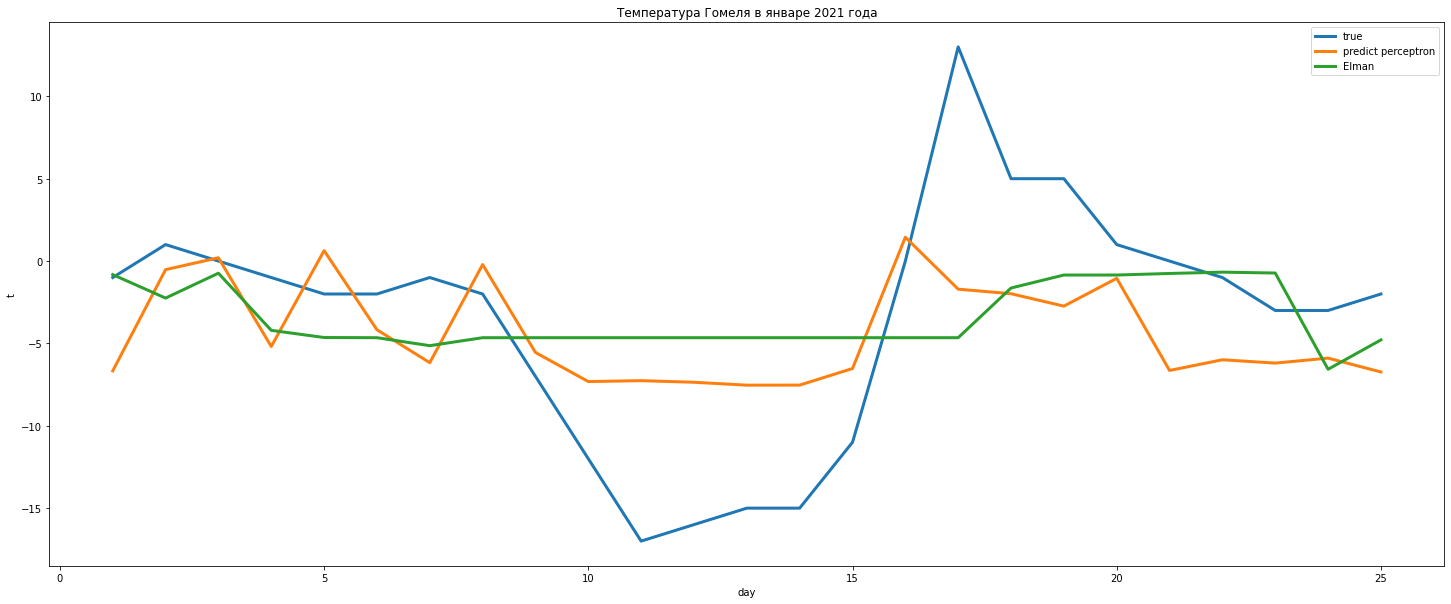

In [ ]:
plt.figure(figsize = (25, 10))
plt.plot(range(1 , len(y1) + 1, 1), y1, linewidth = 3, label = 'true')
plt.plot(range(1 , len(y1) + 1, 1), predict_y_test, linewidth = 3, label = 'predict perceptron')
plt.plot(range(1, len(y1) + 1, 1), predict_Elman , linewidth = 3, label = 'Elman')
plt.legend()
plt.title('Температура Гомеля в январе 2021 года')
plt.xlabel('day')
plt.ylabel('t')

Сеть Элмана

In [ ]:
neuron_count_4 = [8, 4, 1]
network_layer_4 = 3

In [ ]:

def predict2_0(weights, x_train, bias):

  C = []
  output_value_by_every_layer = []
  input_value_by_every_layer = []
  for i in range(len(weights)):
    input_value_of_layer = []
    output_value_of_layer = []

    for j in range(len(weights[i])):
      output_value_neuron = 0

      if(i == 0):
        input_value_neuron = np.dot(weights[i][j], x_train)
      else:
        input_value_neuron = np.dot(weights[i][j], output_value_by_every_layer[i - 1])
      
      output_value_neuron = activate(input_value_neuron)
      output_value_of_layer.append(output_value_neuron)
      input_value_of_layer.append(input_value_neuron)

    if(i == len(weights) - 2):
      C = output_value_of_layer

    if(i != len(weights) - 1):
      output_value_of_layer.append(bias)
    else:
      output_value_of_layer = input_value_of_layer

    input_value_by_every_layer.append(input_value_of_layer)
    output_value_by_every_layer.append(output_value_of_layer)

  return input_value_by_every_layer, output_value_by_every_layer, C

In [ ]:
#Функция расчета значений потери между y-предсказанным и y-тестовым
def err_loss_Elman(x_test, y_test, weights, bias, neuron_on_last_layer):
  loss = 0
  last = len(weights) - 1
  for i in range(len(x_test)):

    y_inp, y_out, C = predict2_0(weights, x_test[i], bias)
    loss += np.square(y_out[last][0] - y_test[i])
  loss = np.sqrt(loss) / len(x_test)
  return loss

In [ ]:
def append_C(x, C):
  for i in range(len(x)):
    for j in range(len(C)):
      x[i].append(C[j])
  return x

In [ ]:
def Elman(epoch, x_train, y_train, x_test, y_test, neuron_on_last_layer, bias, a):  
  weights = generate_weight(len(x_train[0]) + neuron_count_4[-2], neuron_count_4, network_layer_4)

  sigma_list = []
  for i in range(len(weights)):
    any_list = []
    for j in range(len(weights[i])):
      any_list.append(0)
    sigma_list.append(any_list)
  last_index = len(weights) - 1
  error = 0
  C = np.zeros((neuron_on_last_layer))
  L = len(x_train[0])
  l = len(x_test[0])
  x_train = append_C(x_train, C)
  x_test = append_C(x_test, C)
  for i in range(epoch):
    print("Эпоха №{0}".format(i+ 1))
    
    pred_C = []
    for j in range(len(x_train)):
      input_value, output_value, pred_C = predict2_0(weights, x_train[j], bias)
      
      if(j != len(x_train) - 1):
        for p in range(len(C)):
          x_train[j + 1][L + p] = pred_C[p]
      else:
        x_train[j][-1] = pred_C[-1]

      error = y_train[j] - output_value[last_index][0]
      g = dy_activate(input_value[last_index][0]) * error
      sigma_list[last_index][0] = g

      for p in range(len(weights[last_index][0])):
        weights[last_index][0][p] += a * g * output_value[last_index - 1][p]
      
      for p in range(last_index - 1, -1, -1):
        for m in range(len(weights[p])):
          sigma = 0
          for k in range(len(weights[p + 1])):
            sigma += weights[p + 1][k][m] * sigma_list[p + 1][k]
          
          g = sigma * dy_activate(input_value[p][m])
          sigma_list[p][m] = g

          if(p == 0):
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * x_train[j][k]
          else:
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * output_value[p - 1][k]

    print("Loss: {0}".format(err_loss_Elman(x_test, y_test, weights, bias, neuron_on_last_layer)))  
  return weights

In [ ]:
weights_Elman = Elman(1000, x_trn, y_trn, x_tst, y_tst, 4, 1, 1)

Эпоха №1
Loss: 1.9809135646095317
Эпоха №2
Loss: 1.9961870336770904
Эпоха №3
Loss: 2.0021935619350564
Эпоха №4
Loss: 1.9918132740721581
Эпоха №5
Loss: 1.9742911676142147
Эпоха №6
Loss: 1.9153211759213908
Эпоха №7
Loss: 1.7908208308805629
Эпоха №8
Loss: 1.8744391816848536
Эпоха №9
Loss: 1.360687675583226
Эпоха №10
Loss: 1.642508532425332
Эпоха №11
Loss: 1.7533448600174524
Эпоха №12
Loss: 1.7923921638587712
Эпоха №13
Loss: 1.8346536372258841
Эпоха №14
Loss: 1.8754873844846098
Эпоха №15
Loss: 1.908659823513014
Эпоха №16
Loss: 1.9308122540480357
Эпоха №17
Loss: 1.9438209237628186
Эпоха №18
Loss: 1.952435274282725
Эпоха №19
Loss: 1.9594546682237983
Эпоха №20
Loss: 1.9651139758629166
Эпоха №21
Loss: 1.9698290422036189
Эпоха №22
Loss: 1.9737917808398768
Эпоха №23
Loss: 1.9772429603133075
Эпоха №24
Loss: 1.9805896561570702
Эпоха №25
Loss: 1.9813199936902963
Эпоха №26
Loss: 1.9764898771879515
Эпоха №27
Loss: 1.9575661560811835
Эпоха №28
Loss: 1.6955541059997257
Эпоха №29
Loss: 1.794400224967028

In [ ]:
C = np.zeros((4))
x_train = append_C(x1, C)
predict_Elman = []
for i in range(len(x_train)):
  intput, output, C = predict2_0(weights_Elman, x_train[i], 1)
  predict_Elman.append(output[-1][0])